In [2]:
import numpy as np
from matplotlib import pyplot as plt
import math

**Rule**
- Open book, google, wolfram alpha. No LLM allowed.
- No communication regarding exam to anyone except me.
- You will be graded out of 100. Not 110.
- Make sure you notebook runs.

# Part 1 Easy Stuff -- Stright from Exercise (15 points Each)

## MC Integral
Compute
$$ \iint_C (x+y+z+3)^2 \; dV $$ 
where $C$ is a **sphere** of radius 1 center around (0,0,0)

In [3]:
def g(x, y, z):
    if (x**2 + y**2 + z**2) <= 1: # a sphere of radius 1
        return (x + y + z + 3)**2
    else:
        return 0


score, n = 0, 100_000
for i in range(n):
    x, y, z = np.random.random(3) * 2 - 1 
    score += g(x,y,z)

volume = 2**3 #within a 2x2x2 cube centered at 0,0,0
integral = (score * volume) / n
print(integral)

40.213142367172885


## Find the location of the minimum of the following functions

$$
f(x,y) = (x-y)^2 + (x-y-5)^2 + (x-3)^2 + (y-5)^2
$$

In [4]:
from scipy.optimize import minimize

def f(v):
    v = np.asarray(v, dtype=float)
    x, y = v
    return (x-y)**2 + (x-y-5)**2 + (x-3)**2 + (y-5)**2

guess = [1,3] # some arbitrary guess
result = minimize(f, guess)

result.x

array([4.79999993, 3.20000002])

## Solve the following System of Equations
One solution is enough.

$$
\begin{align}
x + 2y + 3z &= 28.47\\
x^2 + 2 y^2 + 3z^2 &= 163.2231\\
x^3 + 2 y^3 + 3z^3 &= 1018.985373
\end{align}
$$

Hint: there is an answer around x=1, y=3, z=6

In [11]:
def u(x,y,z):
    return x + 2*y + 3*z - 28.47

def v(x,y,z):
    return x**2 + 2*y**2 + 3*z**2 - 163.2231

def w(x,y,z):
    return x**3 + 2*y**3 + 3*z**3 - 1018.985373

def ux(x,y,z):
    return 1

def uy(x,y,z):
    return 2

def uz(x,y,z):
    return 3

def vx(x,y,z):
    return 2*x

def vy(x,y,z):
    return 4*y

def vz(x,y,z):
    return 6*z

def wx(x,y,z):
    return 3*x**2

def wy(x,y,z):
    return 6*y**2

def wz(x,y,z):
    return 9*z**2

def solve(x0, y0, z0, n): 
    x = x0
    y = y0
    z = z0
    for i in range(n):
        a = np.array([-u(x,y,z), -v(x,y,z), -w(x,y,z)])
        b = np.array([[ux(x,y,z), uy(x,y,z), uz(x,y,z)],
                      [vx(x,y,z), vy(x,y,z), vz(x,y,z)],
                      [wx(x,y,z), wy(x,y,z), wz(x,y,z)]])
        dx, dy, dz = np.linalg.solve(b,a)
        x += dx
        y += dy
        z += dz
    return x, y, z

x, y, z = solve(1, 3, 6, 500) # our initial guess

print(round(x, 2), round(y, 2), round(z, 2)) # solution based on two decimal points

1.23 3.45 6.78


## Estimate the following number

Consider a stack of cards with number from 1-99 (inclusive) on it. There is only one of each.

What is the probability that when we draw 5 cards at the **same time** what's the probability that the sum is divisible by 5.

Hint: Drawing at the **same time** guarantees you will never get the same number.


In [102]:
import random 

cards = list(range(1,100)) # 1-99 inclusive

def simulate():
    five_cards = random.sample(cards, 5)
    divisible = sum(five_cards) % 5 == 0
    return 1 if divisible else 0

def get_prob(n_times=10_000):
    return sum([simulate() for _ in range(n_times)]) / n_times

get_prob() # do it 10k times for better accuracy

0.202

# Part 2 (25 points each)

## Earthquake Epicenter

Last friday we had a earthquake. Let us learn how people find **When** and **Where** the earthquake happens from all the sensors using this simplified model. Here is how it works:
1) We have multiple sensors all around the globe. (let's assume that we are looking at small section of earth so it's flat enough)
2) Each sensor will record the time it gets the vibration and magnitude of the vibration.
3) The physics of the vibration goes like the following.

**Time Taken**
The speed of sound (earthquake is essentially sound) in earth crust is 4km/s if the epicenter of earthquake is at $x_c, y_c$ and the earth quake happened at $t_0$ then the sensor at $x_s, y_s$ will register the earth quake at
$$
t_s = t_0 + \frac{\sqrt{(x_s-x_c)^2 + (y_s - y_c)^2}}{4}
$$
where $x$'s and $y$'s are in the unit of km and $t$ are in seconds. You can derive this yourself by doing $ distance = velocity \times \Delta t$. It's that simple.

However, the time you get might be off by a little bit due to differnce in earth crust composition but generally the speed of sound in the earth crust is 4km/s.

**Your Task**
You are given the time each sensor pick up the earth quake signal. Find when the earth quake happens and where the epicenter is ($x_c, y_c$ and $t_0$).


**Note**
You can actually find out the amplitude of the earthquake in a similar fashion.

In [104]:
ts = np.array([ 99.63487071, 136.76258997,  65.70616954, 109.35698646,
        37.49148564, 121.73841467, 157.67743463,  60.85064162,
       137.36554128,  99.07318355,  79.43954414,  86.25050858,
       103.22788186,  39.37895675,  48.76897371, 130.48570486,
       122.56354144, 116.04202852, 159.41359631, 122.44617155,
        84.35408015, 109.41400174,  59.99555685,  85.13168737,
       118.73039271, 119.1702448 ,  65.72040041,  71.53628205,
       145.71278147,  71.9493089 ])

locations = np.array([[ 917.83408748,  247.85513256],
       [1144.47197759,  886.38003969],
       [ 781.20733419,  342.67861603],
       [1145.91918096,  539.99058663],
       [ 820.43545817,  652.95964443],
       [ 439.7674196 ,  234.50459092],
       [ 348.593113  , 1010.86617445],
       [ 853.10537643,  744.46868518],
       [ 241.19476545,  668.1662512 ],
       [1088.74673252,  676.25855743],
       [ 612.48898367,  816.10653776],
       [ 521.41655414,  780.86926281],
       [ 596.61405034,  220.09136837],
       [ 631.39589788,  611.24451216],
       [ 829.0617469 ,  702.52189395],
       [ 362.12784037,  866.89706132],
       [ 335.27229071,  369.93753607],
       [ 420.83031323,  286.67047501],
       [ 246.84006886,  228.90805128],
       [ 638.67962011, 1008.56506429],
       [ 813.36245545,  860.9722199 ],
       [1128.62212149,  687.34575451],
       [ 838.17852137,  385.09382079],
       [ 450.65377075,  646.62800937],
       [1172.62406531,  667.70303554],
       [ 607.47026891,  986.09187929],
       [ 571.53510432,  420.14341549],
       [ 507.84672668,  486.18424521],
       [ 347.34301186,  942.96903406],
       [ 994.3210785 ,  529.02045994]])

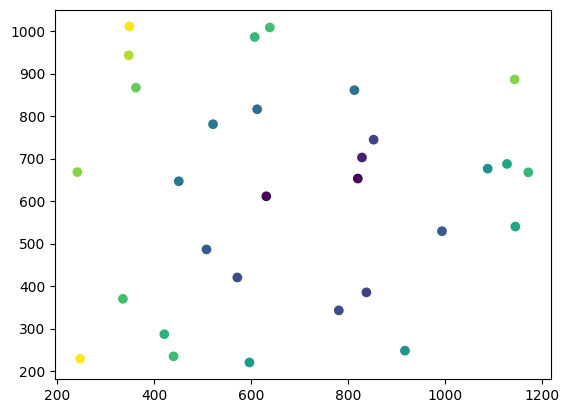

In [105]:
xs, ys = zip(*locations)
plt.scatter(xs, ys, c=ts)

In [217]:
from scipy.optimize import minimize

def cost(x1, y1, x2, y2): # distance between two points
    return ((x2-x1)**2 + (y2-y1)**2) ** 0.5

for i in range(len(ts)):
    current_time = ts[i]
    xs, ys = locations[i][0], locations[i][1]
    
    def f(v):
        v = np.asarray(v, dtype=float)
        xc, yc, t0 = v
        return (t0 + (cost(xc, yc, xs, ys)/4) - current_time)

    result = minimize(f, [700, 700, 10])
    possible_solutions.append(result.x)

# ran out of time..


## Checking Buildings

Sending Rescue. Right after the earthquake you need to send engineer off to inspect various buildings.

You have exactly 2 vans. Both van starts at the marked spots. You wish to cover every spot with 2 vans. For simplicity, you may assume that the van can go in a straight line and the time it takes to go from one place to another is just euclidean distance between the two points

Find the "best route" for each van AND plot it out. 

Explain to me briefly what do you mean by "best" as well in this context (don't think too much anything sensible works).

4.43971504943385


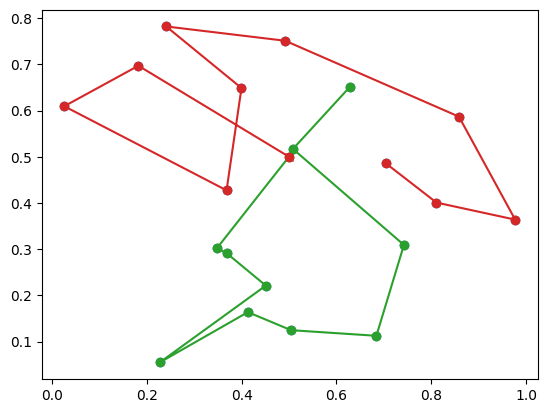

In [196]:
# 'best' is covering all the points in the shortest distance.

np.random.seed(300)
points = np.random.random((20, 2))
xs, ys = zip(*points)
center = np.array([0.5, 0.5])
plt.plot(xs, ys, 'o')
plt.plot(center[0], center[1], 'rx')

def cost(x1, y1, x2, y2): # distance between two points
    return ((x2-x1)**2 + (y2-y1)**2) ** 0.5

def score(path1, path2):
    total = 0

    # include starting point too
    total += cost(0.5, 0.5, path1[0][0], path1[0][1])
    total += cost(0.5, 0.5, path2[0][0], path2[0][1])
    
    # total for first van's path
    for i in range(len(path1) - 1):
        x1, y1, x2, y2 = path1[i][0], path1[i][1], path1[i+1][0], path1[i+1][1]
        total += cost(x1, y1, x2, y2)

    # total for second van's path
    for i in range(len(path2) - 1):
        x1, y1, x2, y2 = path2[i][0], path2[i][1], path2[i+1][0], path2[i+1][1]
        total += cost(x1, y1, x2, y2)
    return total 

def perturb(path1, path2): # swap points between paths
    temp_path1 = path1.copy()
    temp_path2 = path2.copy()
    i, j = random.sample(range(len(temp_path1)), 1), random.sample(range(len(temp_path2)), 1) # make sure its not the center starting point
    
    foo = temp_path1[i] # temp variable for swapping
    temp_path1[i] = temp_path2[j]
    temp_path2[j] = foo
    return temp_path1, temp_path2

def hillclimbing(simulations=20_000):
    # assume 20 points, the default is just both paths split (10 each)
    # include the center as well
    points_temp = points.copy()
    best_first_path = points_temp[:10]
    best_second_path = points_temp[10:]

    best_cost = score(best_first_path, best_second_path)

    for i in range(simulations):
        temp_path1, temp_path2 = perturb(best_first_path, best_second_path)
        temp_cost = score(temp_path1, temp_path2)
        if temp_cost < best_cost:
            best_first_path = temp_path1.copy()
            best_second_path = temp_path2.copy()
            best_cost = temp_cost

    return best_first_path, best_second_path, best_cost

path1, path2, cost = hillclimbing()

path1 = np.insert(path1, 0, center, axis=0)
path2 = np.insert(path2, 0, center, axis=0)

plt.plot(0.5, 0.5, '.')
plt.plot([x for x, y in path1], [y for x, y in path1], '-o')
plt.plot([x for x, y in path2], [y for x, y in path2], '-o')
print(cost)